In [15]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import catboost as cb
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from numpy import where
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from lazypredict.Supervised import LazyClassifier, LazyRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import catboost as cb
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from numpy import where

In [9]:
df = pd.read_excel("usefile.xlsx")

In [10]:
df

,Gender Index,Age,Hypertension,Heart Disease,Martial Status,Work Type Index,Residence Type,Average Glucose Level,BMI,Smoking Status Index,Stroke
0,0,3.00,0,0,0,0,0,95.12,18.00,0,0
1,0,58.00,1,0,1,2,1,87.96,39.20,0,0
2,1,8.00,0,0,0,2,1,110.89,17.60,0,0
3,1,70.00,0,0,1,2,0,69.04,35.90,1,0
4,1,47.00,0,0,1,2,1,210.95,50.10,0,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,1,10.00,0,0,0,0,1,58.64,20.40,0,0
43396,1,56.00,0,0,1,4,1,213.61,55.40,1,0
43397,1,82.00,1,0,1,2,1,91.94,28.90,1,0
43398,0,40.00,0,0,1,2,1,99.16,33.20,0,0


<AxesSubplot:>

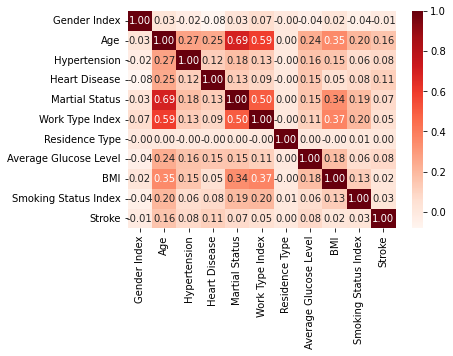

In [11]:
plt.rcParams['figure.figsize'] = (20,10)
sns.heatmap(data=df.corr(),annot=True,fmt='.2f',cmap='Reds')

In [12]:
X = df.iloc[:,0:20]
y = df.iloc[:,-1]

In [13]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns) 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(10,'Score'))

                    Specs    Score
10                 Stroke 42617.00
1                     Age 12694.87
7   Average Glucose Level  4808.05
3           Heart Disease   535.00
2            Hypertension   223.25
4          Martial Status    79.98
5         Work Type Index    67.42
9    Smoking Status Index    36.23
8                     BMI    22.90
0            Gender Index     2.31
